# Description:

It is classification type problem for prediction customer churn in a telecommunication sector. Here we have a dataset which contain the details of customer and churn of custemer.

columns : 21
    
Target : Churn    

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [246]:
df = pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


This is our dataset and churn is our deppendent feature and other 20 are our indipendent feature

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here we can see there is no missing value and we have mixed type of dataset.

In [248]:
for i in df.columns:
    if df[i].dtype == "object":
        print(df[i].value_counts())
        print()

8670-MEFCP    1
5312-UXESG    1
4412-YLTKF    1
2232-DMLXU    1
4685-TFLLS    1
             ..
7601-GNDYK    1
9467-ROOLM    1
3091-FYHKI    1
5696-QURRL    1
0089-IIQKO    1
Name: customerID, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, 

before checking the data type we can notice that totalcharges is an object type but its not an object. so lets try to remove space using strip and change its data type. CoustomerID column is not requerd for our prediction so will be drop it.

In [249]:
df=df.apply(lambda x: x.str.strip() if x.dtype=='object' else x)

In [250]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

now change the object type into float 

In [251]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [252]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

after changing the data type of column TotalCharges we can see that nan value present in that column. so need to handle it

In [253]:
df[df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


These are the rows nan value present . here we can drop the nan rows or replace the nan using fillna. Now I am going to fill with mean or median. for that need to check distribution

In [254]:
df["TotalCharges"].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

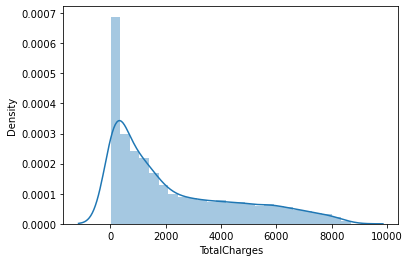

In [255]:
sns.distplot(df["TotalCharges"])

In this column datas are not normally distributed so we can fill the nan with median 

In [256]:
df["TotalCharges"].fillna(df["TotalCharges"].median(),inplace=True)

fill with median

In [257]:
df["TotalCharges"].isnull().sum()

0

In [258]:
df["TotalCharges"].value_counts()

1397.475    11
20.200      11
19.750       9
19.650       8
20.050       8
            ..
607.300      1
1534.050     1
1066.150     1
249.950      1
1024.000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [259]:
df.drop('customerID',axis=1,inplace=True)

droped customerID column

In [260]:
df.shape

(7043, 20)

7043 rows and 20 columns

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

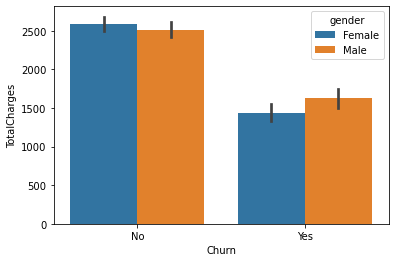

In [261]:
sns.barplot(x="Churn",y="TotalCharges",data=df,hue="gender")

Here we can see that increasing the totalcharges will not much effect in churn. but Lets check maximum totalcharges whether he/she churn or not

In [262]:
df["TotalCharges"].max()

8684.8

In [263]:
df[df["TotalCharges"]==8684.8]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.8,8684.8,Yes


Here we can see that highest charge is 8684.8 and he was churn

In [264]:
df["TotalCharges"].min()

18.8

In [265]:
df[df["TotalCharges"]==18.8]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1654,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.8,18.8,No


Here also can see lowest totalcharged customer where no churn.

<AxesSubplot:xlabel='Churn', ylabel='count'>

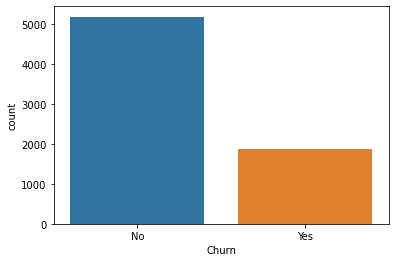

In [266]:
sns.countplot(df["Churn"])

This is our target column and here we can see that data imbalansing.

<AxesSubplot:xlabel='Contract', ylabel='count'>

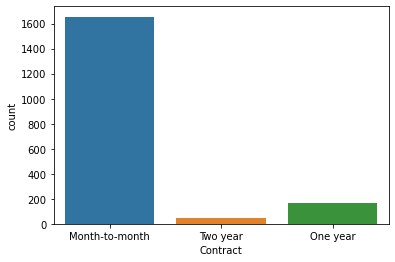

In [267]:
sns.countplot(x="Contract",data=df[df["Churn"]=="Yes"])

highest number of customer churned in the contract of month-to-month

<AxesSubplot:xlabel='gender', ylabel='count'>

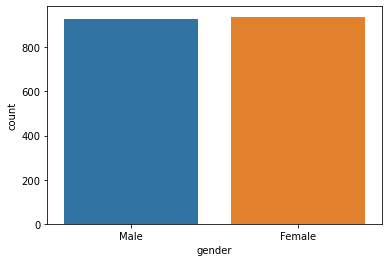

In [268]:
sns.countplot(x="gender",data=df[df["Churn"]=="Yes"])

both male and female are equaly churn

<AxesSubplot:xlabel='Partner', ylabel='count'>

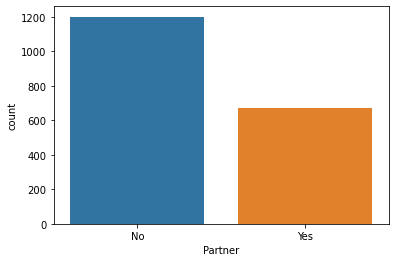

In [269]:
sns.countplot(x="Partner",data=df[df["Churn"]=="Yes"])

highest number of partners are no churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

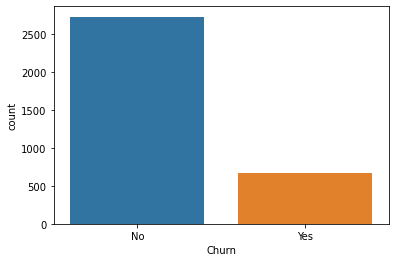

In [270]:
sns.countplot(x="Churn",data=df[df["Partner"]=="Yes"])

<AxesSubplot:xlabel='Churn', ylabel='count'>

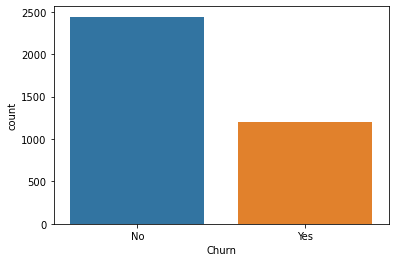

In [271]:
sns.countplot(x="Churn",data=df[df["Partner"]=="No"])

compare between above two graph non partner customer are churn

# Encoding

In [272]:
label = LabelEncoder()
df["Churn"] = label.fit_transform(df["Churn"])

In [273]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [274]:
col = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]
for i in col:
    df[i]=pd.get_dummies(df[i],drop_first=True)


# split

Before handling data imbalance

In [275]:
x = df.drop(columns=["Churn"])
y =df["Churn"]

In [277]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Scaling

In [278]:
x = StandardScaler().fit_transform(x)

In [279]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3 , random_state = 0)

In [280]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1560
           1       0.66      0.50      0.57       553

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



so f1 score of majority class is 87 and recall 89 but minority class where very poor, it is because of data imbalancing . Lets try to solve it

# Random Oversampling

In [281]:
count_class_0,count_class_1 = df.Churn.value_counts()

df_class_0 = df[df["Churn"]==0]
df_class_1 = df[df["Churn"]==1]
print(df_class_0.shape)
print(df_class_1.shape)
print(count_class_0,count_class_1)

(5174, 20)
(1869, 20)
5174 1869


In [282]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)

Churn_new = pd.concat([df_class_0,df_class_1_over],axis=0)
print("Random over-sampling:")

print(Churn_new.Churn.value_counts())

Random over-sampling:
1    5174
0    5174
Name: Churn, dtype: int64


In [283]:
x = Churn_new.drop("Churn",axis="columns")

y = Churn_new[["Churn"]]

In [285]:
x = StandardScaler().fit_transform(x)

In [286]:

maxAccu=0
maxRs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i

print("best accuracy is",maxAccu,"on random_state",maxRs)        

best accuracy is 0.7651537335285505 on random_state 32


In [287]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.3,random_state=32)

In [288]:
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)
    print("Accuracy score is:",acc)
    print("\n")
    print(classification_report(y_test,pred))
    print("\n")
    plot_roc_curve(model,x_test,y_test)
    plt.title("Receiver operating characteristics")
    plt.xlabel("False positive Rate")
    plt.ylabel("True positive Rate")
    plt.show()
    

Accuracy score is: 0.7603864734299517


              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1539
           1       0.76      0.78      0.77      1566

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105





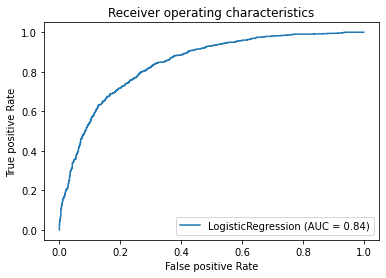

In [291]:
eval(LogisticRegression())

The performance of the model is better than previous. Model give equal importance in both categories. f1 and recall are near by value . AUC value also above 84% . good performance . lets try other model

Accuracy score is: 0.885024154589372


              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1539
           1       0.85      0.94      0.89      1566

    accuracy                           0.89      3105
   macro avg       0.89      0.88      0.88      3105
weighted avg       0.89      0.89      0.88      3105





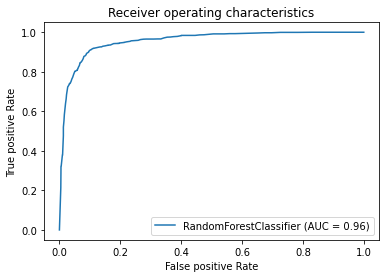

In [293]:
eval(RandomForestClassifier())

performance of the model is good compared with previous

Accuracy score is: 0.6859903381642513


              precision    recall  f1-score   support

           0       0.82      0.47      0.60      1539
           1       0.63      0.90      0.74      1566

    accuracy                           0.69      3105
   macro avg       0.73      0.68      0.67      3105
weighted avg       0.72      0.69      0.67      3105





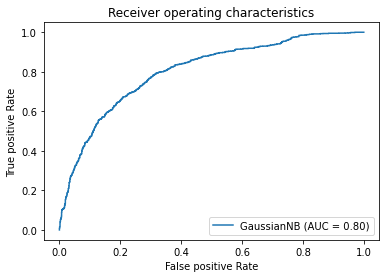

In [294]:
eval(GaussianNB())

There are high differents between recall. so it is not a good model

In [297]:
lr=LogisticRegression()
parameter = {'C':10.0 **np.arange(-2,3),
            'penalty':['l1','l2','elasticnet','none'],
            'solver':['newton-cg','lbfgs','saga']}

cv=KFold(n_splits=5,random_state=None,shuffle=False)

gcv=GridSearchCV(lr,parameter,cv=cv)

In [298]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'saga']})

In [299]:
gcv.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [300]:
lr_new=LogisticRegression(C=0.01,penalty='l1',solver='saga')
lr_new.fit(x_train,y_train)
pred=lr_new.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.7671497584541063
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1539
           1       0.76      0.78      0.77      1566

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



There is not much improvement in model prediction

In [301]:
rf = RandomForestClassifier()

parameter = {'max_features':['auto','sqrt','log2'],
            'criterion': ['gini','entropy'],
            'max_depth': np.arange(1,10)}

cv=KFold(n_splits=5,shuffle=False, random_state=None)
gcv = GridSearchCV (rf , parameter , cv=cv)

In [302]:
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt'}

In [303]:
rf_new=RandomForestClassifier( criterion = 'gini', max_depth= 9 ,max_features='sqrt')
rf_new.fit(x_train,y_train)
pred=rf_new.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8206119162640901
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1539
           1       0.80      0.85      0.83      1566

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



so this is our final model . model prediction is good , might be before there are over fitting the model.


conclusion:

RandomForestClassifier is my best model and it's accuracy is 82

# SAVE

In [305]:
import joblib
joblib.dump(rf_new,"rf_Churn.pkl")

['rf_Churn.pkl']